In [1]:
import pandas as pd
import tqdm
from tqdm import tqdm_notebook
import seaborn as sns

In [2]:
df_housing_price = pd.read_csv('data/Metro_Zhvi_5BedroomOrMore.csv')

In [3]:
df_housing_price.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,102001,United States,0,203700.0,204000.0,204300.0,204700.0,205100.0,205700.0,206200.0,...,483000,485600,488100,490100,491200,491900,491800,491100,490400,490300
1,394913,"New York, NY",1,276600.0,276900.0,277100.0,277100.0,277200.0,277300.0,277600.0,...,712400,714400,716800,721100,724900,727200,727300,725700,722900,721200
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,315600.0,315600.0,315800.0,316000.0,316400.0,316900.0,317800.0,...,1103100,1107200,1110200,1110500,1106300,1101900,1098300,1094800,1092800,1093900
3,394463,"Chicago, IL",3,281300.0,282700.0,283500.0,283800.0,283500.0,282800.0,281600.0,...,490900,492500,494700,496700,498000,497800,495100,491100,487200,484800
4,394514,"Dallas-Fort Worth, TX",4,291800.0,289900.0,288500.0,287500.0,286900.0,286500.0,285600.0,...,462900,466300,468700,469400,469100,469700,469400,467500,465200,464400


In [4]:
dates = list(df_housing_price.columns)
dates.remove('RegionID')
dates.remove('RegionName')
dates.remove('SizeRank')


In [5]:
df_housing_price_formatted = pd.DataFrame()
temp = pd.DataFrame()

for index,row in tqdm_notebook(df_housing_price.iterrows()):
    temp['date'] = dates
    temp['RegionID'] = row['RegionID']
    temp['RegionName'] = row['RegionName']
    temp['SizeRank'] = row['SizeRank']
    temp['Price'] = list(row[3:].values)
    df_housing_price_formatted = pd.concat([df_housing_price_formatted,temp], ignore_index=True) 

In [6]:
df_housing_price_formatted.head()

,date,RegionID,RegionName,SizeRank,Price
0,1996-04,102001,United States,0,203700.0
1,1996-05,102001,United States,0,204000.0
2,1996-06,102001,United States,0,204300.0
3,1996-07,102001,United States,0,204700.0
4,1996-08,102001,United States,0,205100.0


In [7]:
df_housing_price_formatted = df_housing_price_formatted.dropna()
df_housing_price_formatted['Price'] = pd.to_numeric(df_housing_price_formatted['Price'])
df_housing_price_formatted.head()

,date,RegionID,RegionName,SizeRank,Price
0,1996-04,102001,United States,0,203700.0
1,1996-05,102001,United States,0,204000.0
2,1996-06,102001,United States,0,204300.0
3,1996-07,102001,United States,0,204700.0
4,1996-08,102001,United States,0,205100.0


In [8]:
len(list(set(df_housing_price_formatted['RegionName'])))

530

In [9]:
df_housing_price_formatted['pct'] = df_housing_price_formatted.sort_values('date').groupby(['RegionName']).Price.pct_change()

In [10]:
df_housing_price_formatted.head()

,date,RegionID,RegionName,SizeRank,Price,pct
0,1996-04,102001,United States,0,203700.0,NaN
1,1996-05,102001,United States,0,204000.0,0.001473
2,1996-06,102001,United States,0,204300.0,0.001471
3,1996-07,102001,United States,0,204700.0,0.001958
4,1996-08,102001,United States,0,205100.0,0.001954


In [11]:
#list(set(df_housing_price_formatted['RegionName']))

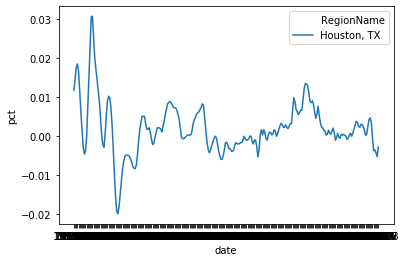

In [12]:
cities = ['Houston, TX']
tex = df_housing_price_formatted[df_housing_price_formatted['RegionName'].isin(cities)]
ax = sns.lineplot(x="date", y="pct",hue="RegionName", data=tex)